In [176]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [177]:
import numpy as np

<h1> Loading minst dataset </h1>

importing the mnist data set from keras and splitting it in to test and train data

In [178]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()


<h1> visualizing the data </h1>

In [179]:
len(X_train)

60000

In [180]:
X_train[0].shape

(28, 28)

In [181]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

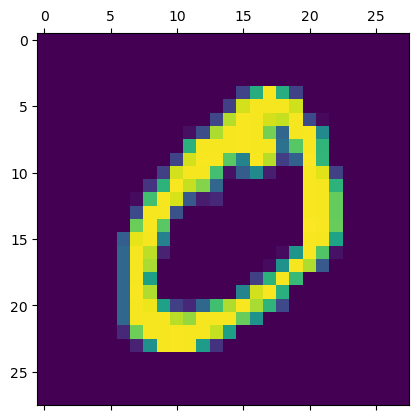

In [182]:
plt.matshow(X_train[1])

In [183]:
Y_train[1]

0

In [184]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [185]:
X_train.shape

(60000, 28, 28)

changing the data to 0-1  range for better accuracy

In [186]:
X_train= X_train/255
X_test = X_test/255


reshaping (flattening ) the data 

In [190]:
X_train_flattend= X_train.reshape(len(X_train),28*28)
X_test_flattend= X_test.reshape(len(X_test),28*28)




In [166]:
Y_train.shape

(60000,)

In [167]:
X_test_flattend.shape

(10000, 784)

In [168]:
X_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [188]:
X_test = X_test.reshape(-1, 784)

<h1> Functions to train the model </h1>
<h3>first, model train with no hidden layer<h3> 

In [189]:
#training with no hidden layers
def no_hidden_layer(X_train_flattend,Y_train,epoch):
    model= keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']

    )

    model.fit(X_train_flattend,Y_train,validation_data=(X_test, Y_test),epochs=epoch )
    return model


<h3>second, model train with one hidden layer</h3>

In [192]:
#training with one hidden layer
def one_hidden_layer(X_train_flattend,Y_train,epoch):
    model= keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(
        
      optimizer='adam',
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
    )
   
    model.fit(X_train_flattend,Y_train,validation_data=(X_test, Y_test),epochs=epoch)
   
    return model

<h1> Training the model with no hidden layers </h1> 

In [191]:
model=no_hidden_layer(X_train_flattend,Y_train,5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4902 - acc: 0.8744 - val_loss: 0.3077 - val_acc: 0.9167
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3054 - acc: 0.9162 - val_loss: 0.2860 - val_acc: 0.9187
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2852 - acc: 0.9206 - val_loss: 0.2774 - val_acc: 0.9237
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2746 - acc: 0.9243 - val_loss: 0.2687 - val_acc: 0.9258
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2676 - acc: 0.9265 - val_loss: 0.2646 - val_acc: 0.9251


<h1> Testing the model with no hidden layer </h1>

the model with no hidden layer gives an accuracy of 92 percent 

In [193]:
model.evaluate(X_test_flattend,y_test)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.2646 - acc: 0.9251


[0.26463529813587666, 0.9251]

In [204]:
y_predicted=model.predict(X_test_flattend)
y_predicted[1]

array([1.5255809e-04, 1.3113022e-06, 3.2843766e-01, 1.3026595e-04,
       0.0000000e+00, 1.7699301e-03, 1.3635755e-03, 0.0000000e+00,
       6.3776970e-05, 0.0000000e+00], dtype=float32)

since the above cell out gave us the likeliness of all the 10 digits, we will out put the maximum likeliness using argmax

In [205]:
np.argmax(y_predicted[1])

2

In [206]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [207]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<h1> training with one hidden layer </h1>

<p>adding on hidden layer for better accuracy </p>

In [208]:
model1=one_hidden_layer(X_train_flattend,Y_train,5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2787 - acc: 0.9201 - val_loss: 0.1481 - val_acc: 0.9562
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1267 - acc: 0.9628 - val_loss: 0.1050 - val_acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0892 - acc: 0.9731 - val_loss: 0.0887 - val_acc: 0.9732
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0687 - acc: 0.9793 - val_loss: 0.0843 - val_acc: 0.9746
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0545 - acc: 0.9831 - val_loss: 0.0849 - val_acc: 0.9736


<h1> Testing the model with one hidden layer </h1>

the model with one hidden layer gives an accuracy of 97 percent with is 5 percent more than the model with no hidden layer

In [209]:
model1.evaluate(X_test_flattend,y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0849 - acc: 0.9736


[0.0848653153634863, 0.9736]

 we will out put the maximum likeliness from all the 10 digits using argmax

In [210]:
y_predicted=model1.predict(X_test_flattend)
np.argmax(y_predicted[1])

2

In [211]:
y_predicted_labels1=[np.argmax(i) for i in y_predicted]
y_predicted_labels1[:5]

[7, 2, 1, 0, 4]